# Introduction
This repo showcases how to load a MNIST handwriten dataset and train a tensorflow model using the functional API

Define model

In [3]:
from tensorflow.keras.layers import Input
import numpy as np
from model import MnistModel, load_data

inputs = Input(shape=(28, 28))
mnist = MnistModel(inputs=inputs)

Load MNIST data

In [6]:
(x_train, y_train), (x_test, y_test) = load_data()

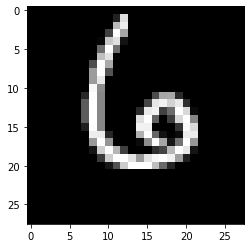

In [17]:
from matplotlib import pyplot as plt

#get a random number from the training set
rand = np.random.choice(x_train.shape[0], size=1, replace=False)

first_image = x_train[rand]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
Show multiple images

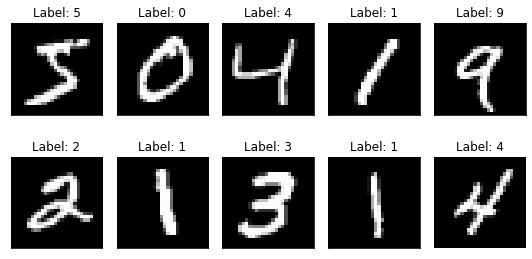

In [47]:
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i, index in enumerate(np.random.choice(x_train.shape[0], size=10, replace=False)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    ax.set_xticks([])
    # for minor ticks
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    # for minor ticks
    ax.set_yticks([], minor=True)
plt.axis('off')
plt.tight_layout()
plt.show()

Compile, train and evaluate

In [48]:
mnist.my_compile()
mnist.my_fit(x=x_train, y=y_train, epochs=30)
mnist.summary()
acc = mnist.evaluate(x=x_test, y=y_test)
print(acc)

Epoch 1/30
5400/5400 [==============================] - 21s 4ms/step - loss: 0.1718 - accuracy: 0.9656 - val_loss: 0.1715 - val_accuracy: 0.9737
Epoch 2/30
5400/5400 [==============================] - 20s 4ms/step - loss: 0.1517 - accuracy: 0.9744 - val_loss: 0.1499 - val_accuracy: 0.9780
Epoch 3/30
5400/5400 [==============================] - 20s 4ms/step - loss: 0.1253 - accuracy: 0.9788 - val_loss: 0.2001 - val_accuracy: 0.9703
Epoch 4/30
5400/5400 [==============================] - 20s 4ms/step - loss: 0.1183 - accuracy: 0.9811 - val_loss: 0.2719 - val_accuracy: 0.9743
Epoch 5/30
5400/5400 [==============================] - 20s 4ms/step - loss: 0.1300 - accuracy: 0.9821 - val_loss: 0.2100 - val_accuracy: 0.9733
Epoch 6/30
5400/5400 [==============================] - 20s 4ms/step - loss: 0.0989 - accuracy: 0.9848 - val_loss: 0.2722 - val_accuracy: 0.9792
Epoch 7/30
5400/5400 [==============================] - 21s 4ms/step - loss: 0.1013 - accuracy: 0.9860 - val_loss: 0.2524 - val_ac

Get a random image from x_test and predict what number it is

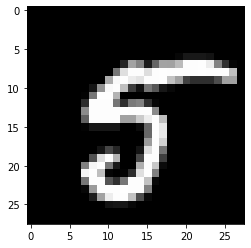

prediction: 5


In [49]:
rand = np.random.choice(x_test.shape[0], size=1, replace=False)
x_pred = x_test[rand]

first_image = x_pred
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

y_hat = mnist.predict(x_pred)
print('prediction:',np.argmax(y_hat))